In [ ]:
import torch
import matplotlib.pyplot as plt

In [ ]:
loaded_reward_dict = torch.load('/home/noahfang/Documents/Lab/AIRL_with_progress/replayed_traj/test.pt')
loaded_reward_dict = {k: v for k, v in loaded_reward_dict.items() if v}

In [ ]:
# 计算每个键的总reward
total_rewards_per_key = {key: sum(rewards) for key, rewards in loaded_reward_dict.items()}
# 计算所有键的总reward平均值
average_total_reward = sum(total_rewards_per_key.values()) / len(total_rewards_per_key)

In [ ]:
for key in loaded_reward_dict:
    # 计算每个size/10的reward总和
    total_length = len(loaded_reward_dict[key]) # 计算reward总长度
    size = total_length // 10  # 计算每个区间的大小
    cumulative_rewards = [0] * 10  # 初始化累计奖励列表
    # 计算该key的总reward
    total_reward = total_rewards_per_key[key]
    # 累计计算每个区间的reward总和
    for i in range(10):
        interval_sum = 0
        # 对于每个键，计算该区间内的reward总和
        interval_sum += sum(loaded_reward_dict[key][i*size:(i+1)*size])
        cumulative_rewards[i] = interval_sum if i == 0 else cumulative_rewards[i-1] + interval_sum
    # 设置图形的横纵坐标值
    intervals = [(i+1) for i in range(10)]
    # cumulative_rewards = [cumulative_rewards[i]/average_total_reward * 100 for i in range(10)]
    cumulative_rewards = [cumulative_rewards[i]/total_reward * 100 for i in range(10)]
    # 画图
    plt.plot(intervals, cumulative_rewards, marker='o')
    plt.title('Cumulative Reward per Interval')
    plt.xlabel('Steps')
    plt.ylabel('Cumulative Reward')
    plt.grid(True)
    plt.show()


In [ ]:
#head files for data analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy.stats as stats
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
# read trajectories from folder bags

nop = 40
trajectories = []
progresses = []
steps = []
scalars = []
ind = []

for i in range(nop):
    traj = []
    step = []
    progress = []
    scalar = []
    
    pose_path = "/home/noahfang/Documents//Lab/LfD_with_porgress-master/bags/user_"+str(i)+"/0_poses.txt"
    step_path = "/home/noahfang/Documents//Lab/LfD_with_porgress-master/bags/user_"+str(i)+"/0_step.txt"
    progress_path = "/home/noahfang/Documents//Lab/LfD_with_porgress-master/bags/user_"+str(i)+"/0_progress.txt"
    scalar_path = "/home/noahfang/Documents//Lab/LfD_with_porgress-master/bags/user_"+str(i)+"/0_scalar.txt"
    if not os.path.exists(pose_path) or not os.path.exists(step_path) or not os.path.exists(progress_path) or not os.path.exists(scalar_path):
        continue
    ind.append(i)
    with open(pose_path, 'r') as file:
        for line in file:
            x, y, z = map(float, line.strip().split())
            traj.append([x, y, z])
    trajectories.append(traj)

    with open(step_path, 'r') as file:
        for line in file:
            step.append(int(line.strip()))
    steps.append(step)

    with open(progress_path, 'r') as file:
        for line in file:
            progress.append(int(line.strip()))
    progresses.append(progress)

    with open(scalar_path, 'r') as file:
        for line in file:
            scalar.append(int(line.strip()))
    scalars.append(scalar)

    
print(len(trajectories))
print(len(progresses))
print(len(steps))
print(len(scalars))
print(ind)

In [54]:
cumulative_rewards = {}
for key in ind:
    # 计算每个size/10的reward总和
    total_length = len(loaded_reward_dict[key]) # 计算reward总长度
    size = total_length // 10  # 计算每个区间的大小
    cumulative_rewards[key] = [0] * 10  # 初始化累计奖励列表
    # 计算该key的总reward
    total_reward = total_rewards_per_key[key]
    # 累计计算每个区间的reward总和
    for i in range(10):
        interval_sum = 0
        # 对于每个键，计算该区间内的reward总和
        interval_sum += sum(loaded_reward_dict[key][i*size:(i+1)*size])
        cumulative_rewards[key][i] = interval_sum if i == 0 else cumulative_rewards[key][i-1] + interval_sum
    # 设置图形的横纵坐标值
    intervals = [(i+1) for i in range(10)]
    # cumulative_rewards = [cumulative_rewards[i]/average_total_reward * 100 for i in range(10)]
    cumulative_rewards[key] = [cumulative_rewards[key][i]/total_reward * 100 for i in range(10)]


In [64]:
print(cumulative_rewards)

{3: [6.17700582040129, 13.822738380284532, 26.382040422026805, 37.65105248060729, 49.38537281399653, 61.58284229333956, 71.7093147391046, 81.44759778304548, 91.47149329091488, 100.0], 4: [13.127892537520442, 24.808217986142537, 36.980608382822794, 50.259606937613945, 63.607438668144546, 75.45628894587452, 83.25241882978874, 89.86262659292935, 91.10658661335628, 97.82991237001049], 5: [13.128521442397185, 25.824820213634215, 38.52866628724826, 51.68380582280674, 64.72936187930829, 78.15935662053369, 91.10927797401173, 98.80312600549783, 101.18006296982105, 100.27375429408451], 6: [5.840085490504549, 14.416496052548226, 24.943787641228298, 35.80199016759839, 47.33738222716316, 58.28081932101509, 69.47646588492194, 76.38494496092176, 88.33505330120046, 99.48643795509159], 7: [10.008778751982389, 20.312082917965345, 31.840691345654765, 43.23759809552764, 46.713928557340495, 49.81639955757002, 58.333366141826524, 61.83374302890267, 74.63985942876342, 97.85260395406054], 8: [8.72452109087496

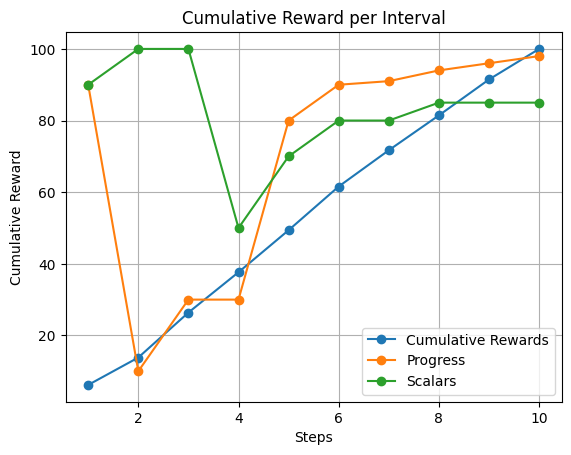

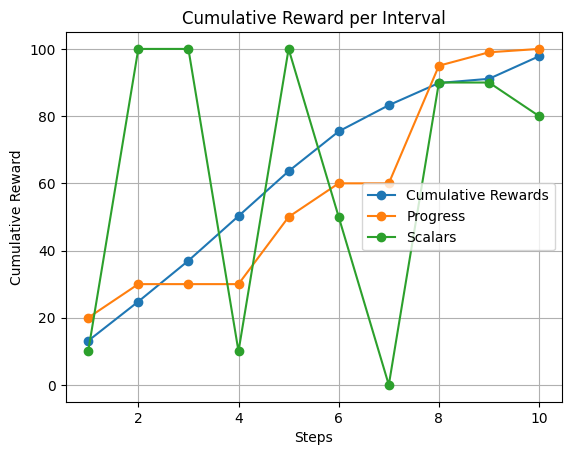

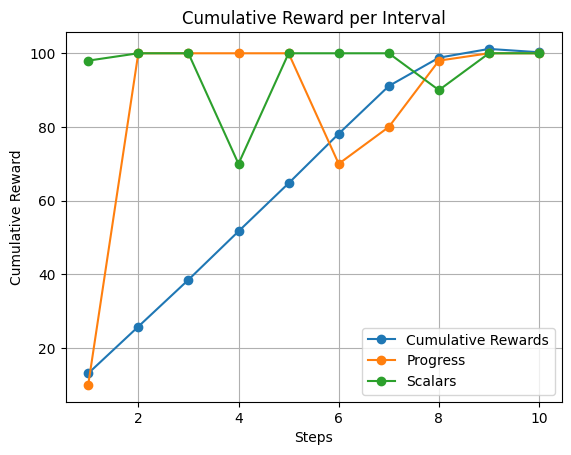

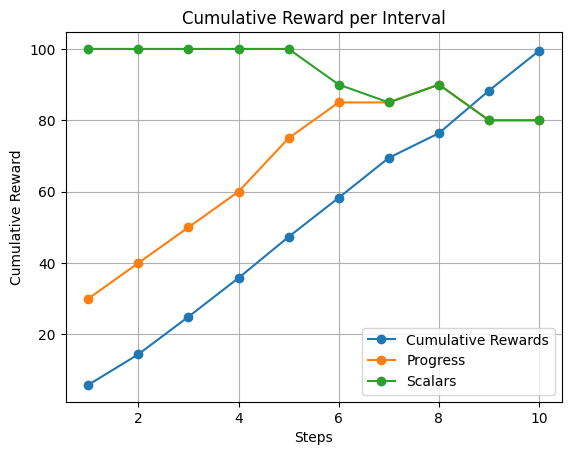

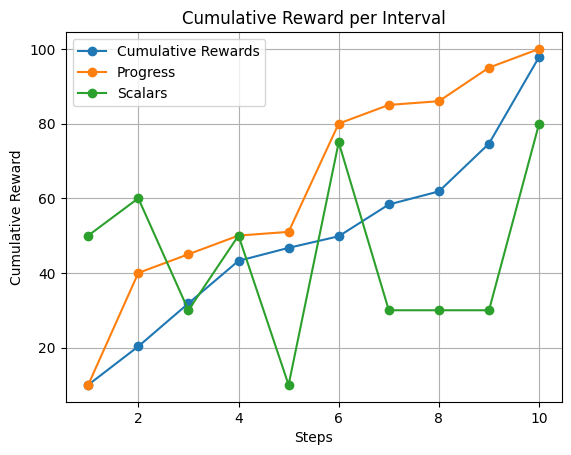

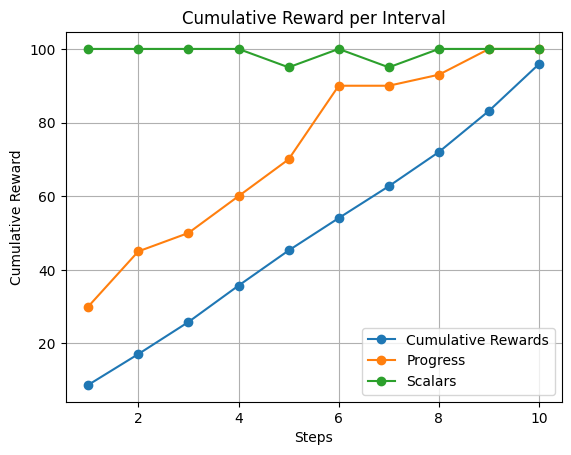

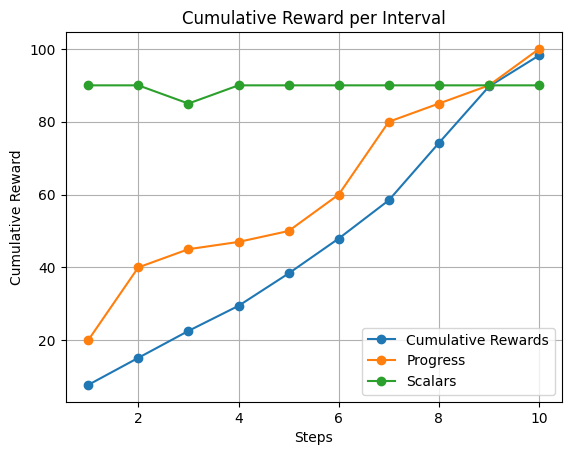

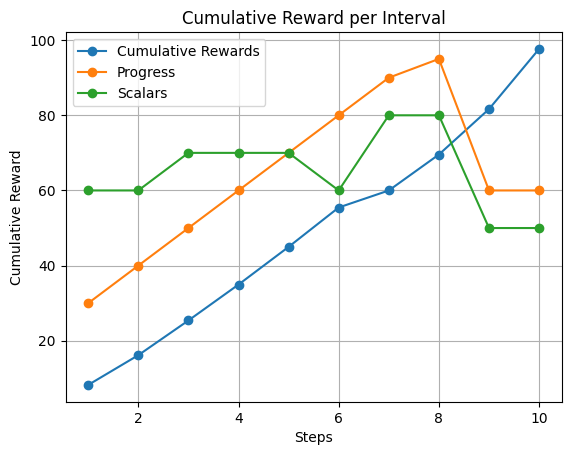

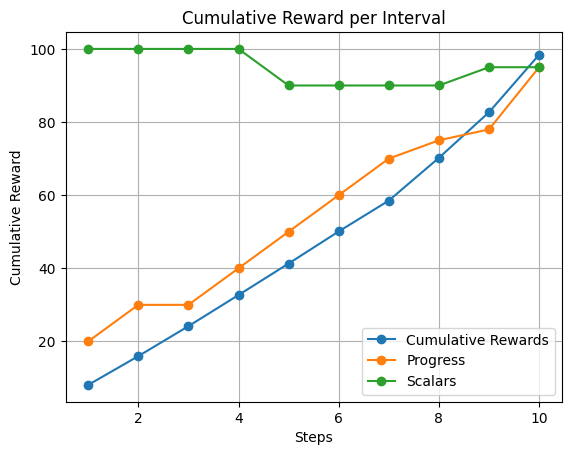

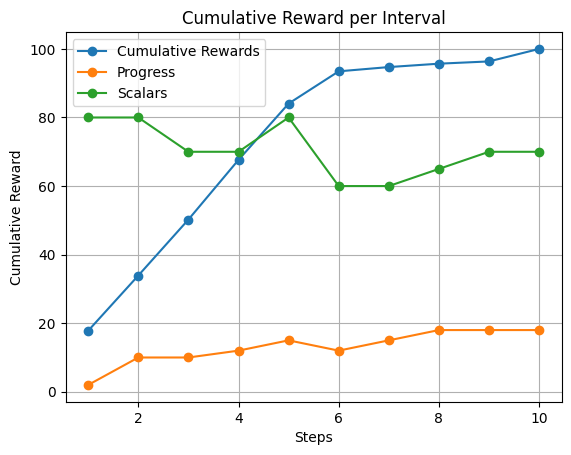

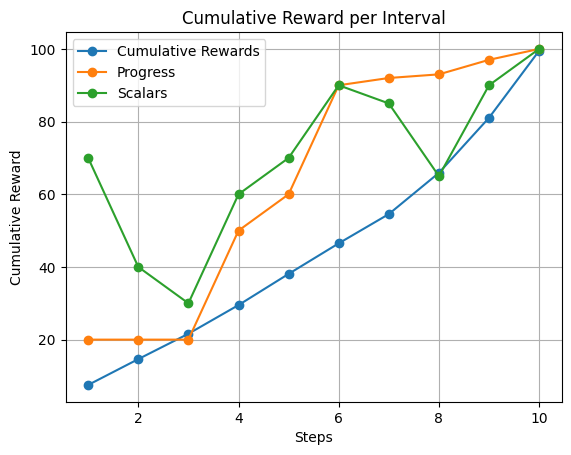

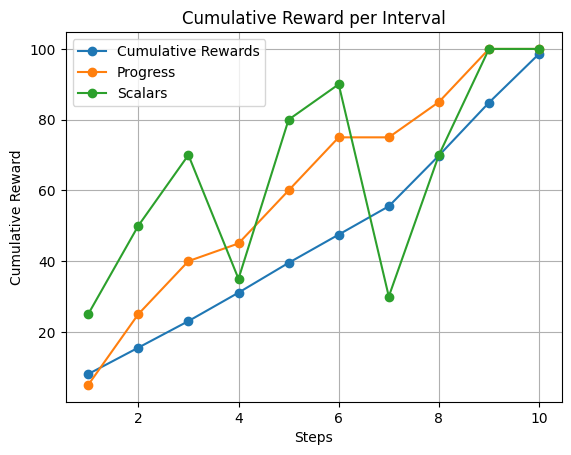

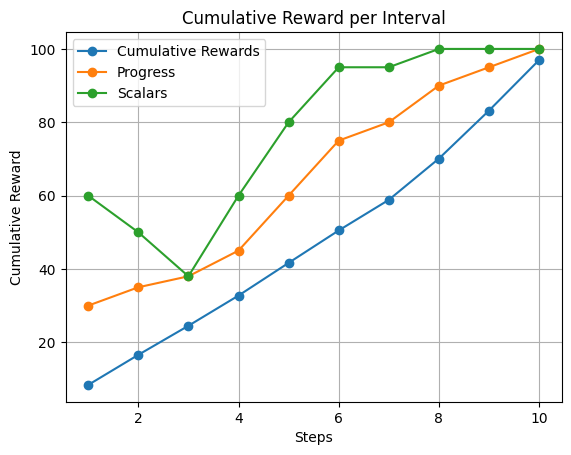

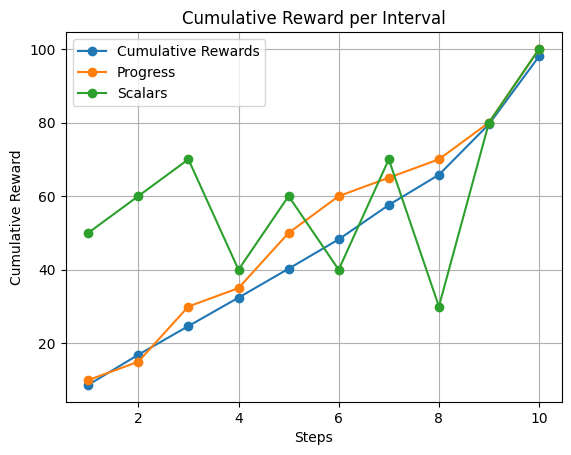

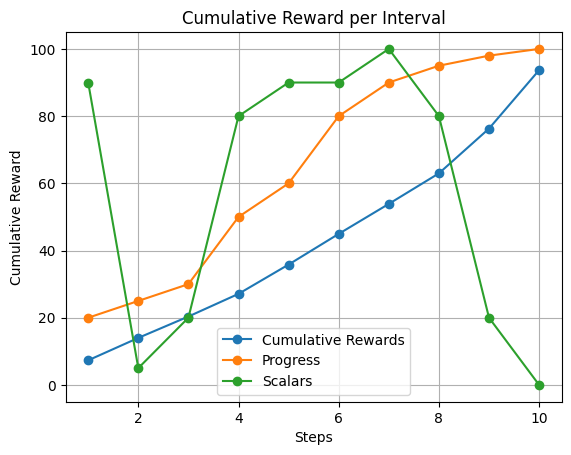

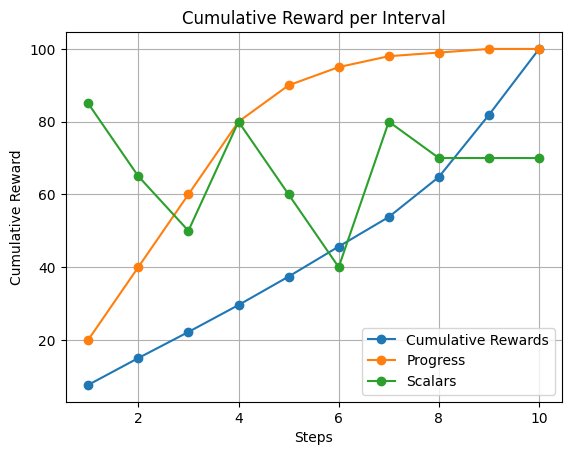

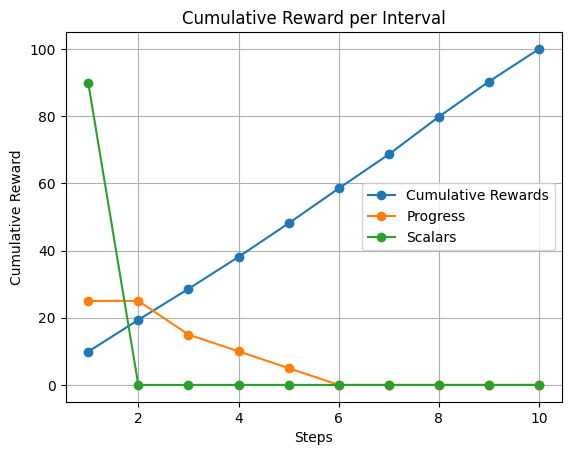

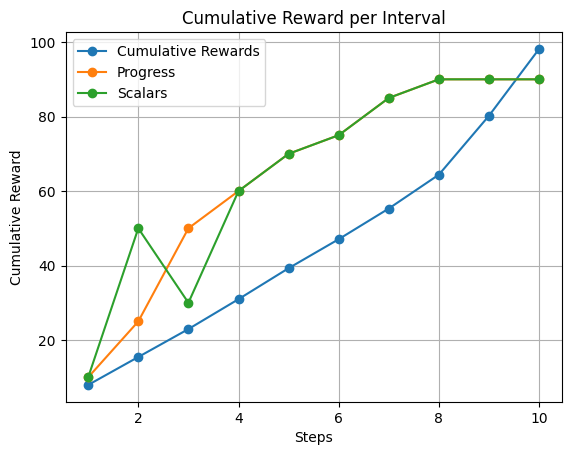

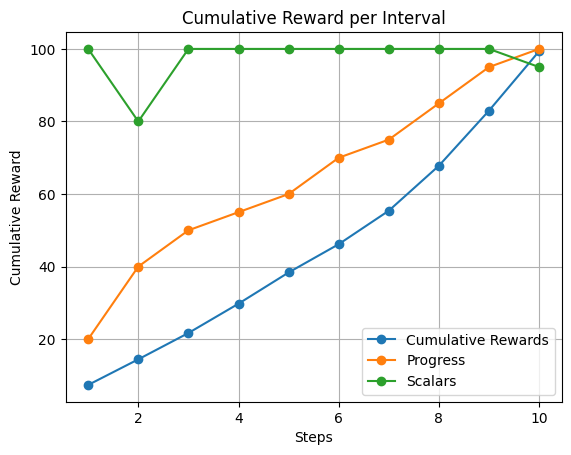

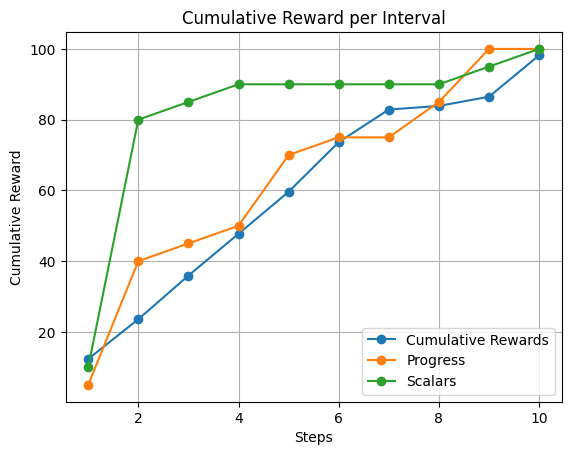

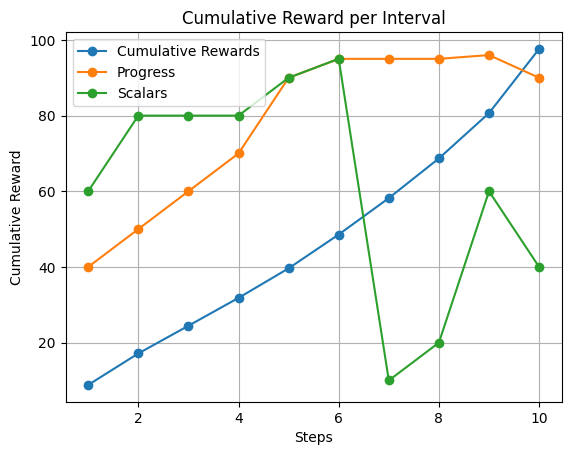

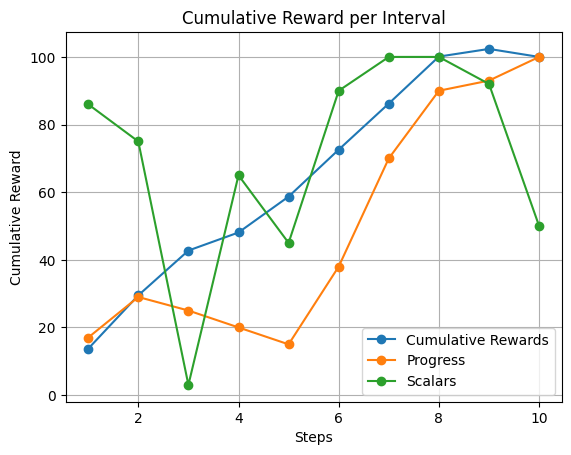

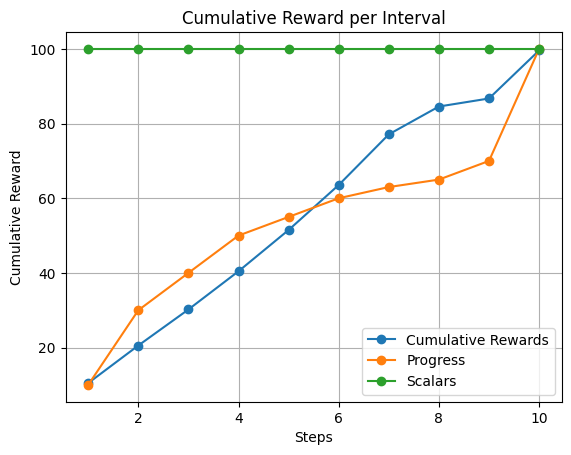

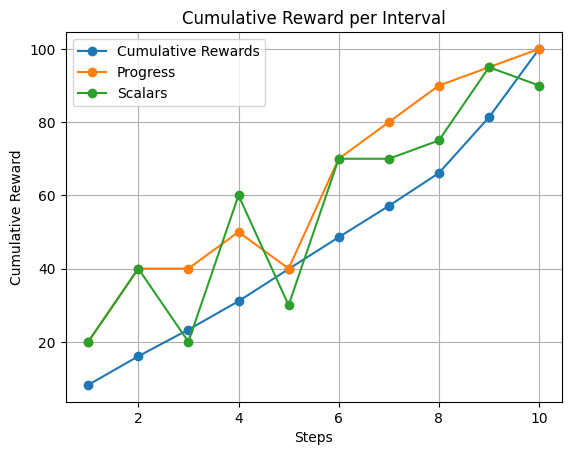

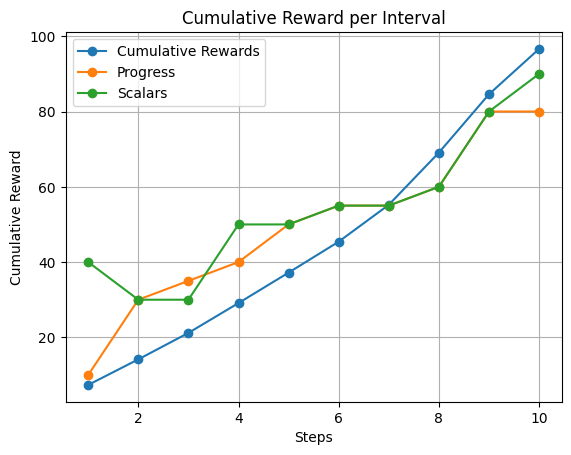

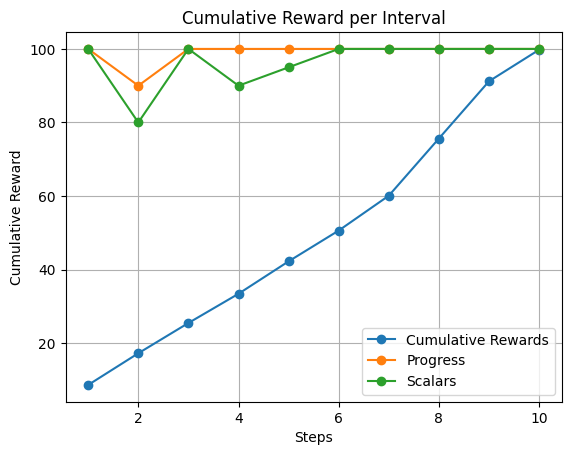

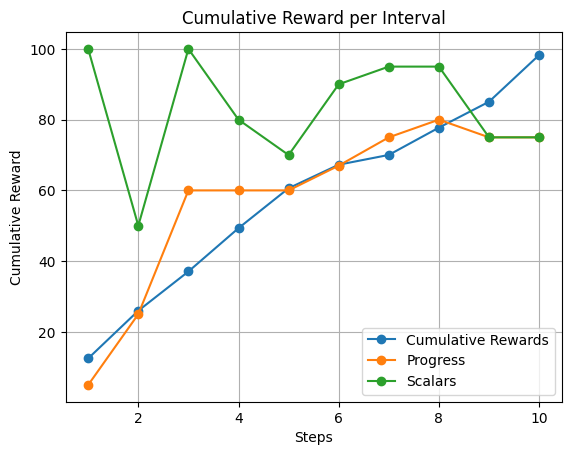

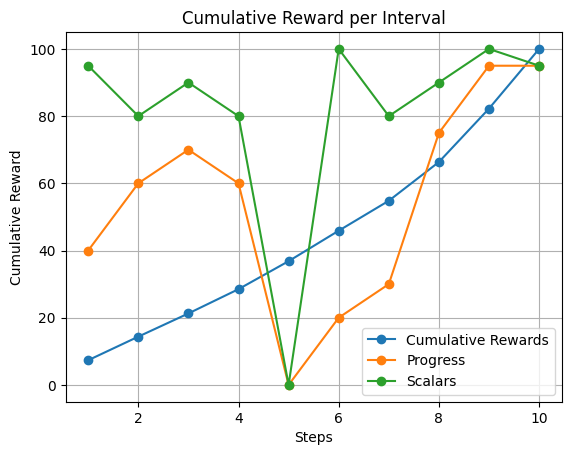

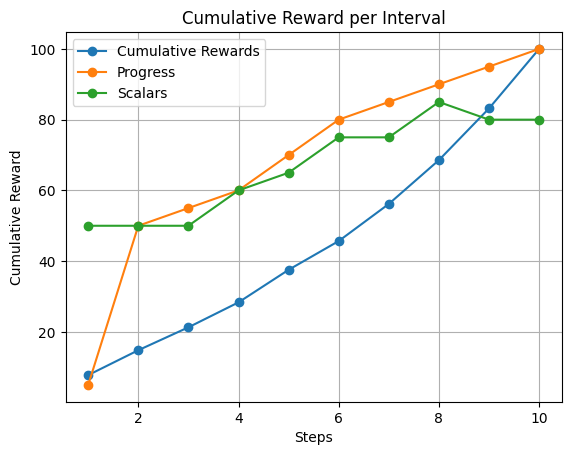

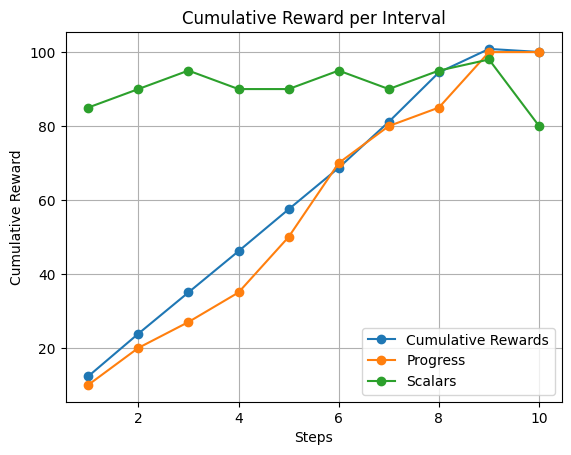

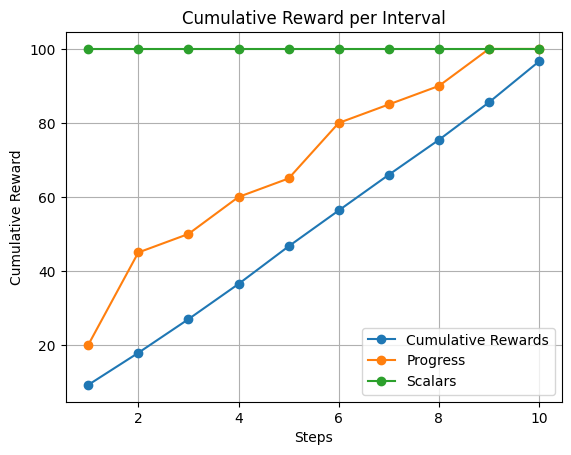

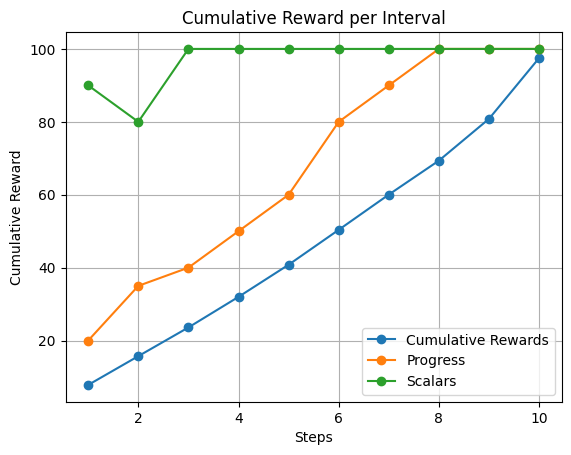

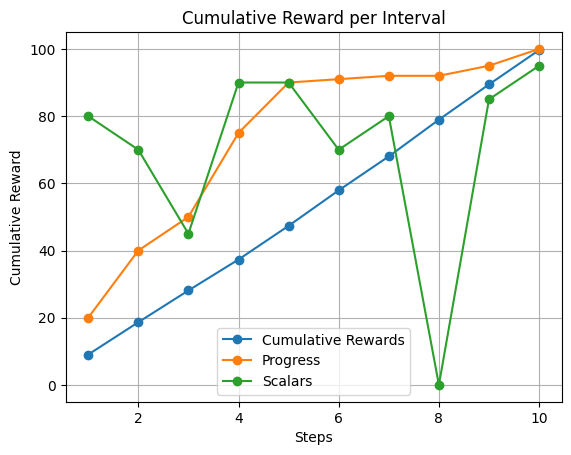

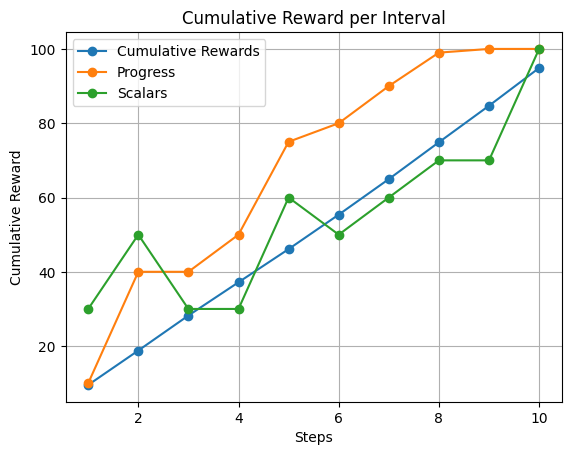

In [68]:
for i, item in enumerate(cumulative_rewards.values()):
    intervals = [(i+1) for i in range(10)]
    plt.plot(intervals, item, marker='o', label='Cumulative Rewards')  
    plt.plot(intervals, progresses[i], marker='o', label='Progress')  
    plt.plot(intervals, scalars[i], marker='o', label='Scalars')  
    plt.title('Cumulative Reward per Interval')
    plt.xlabel('Steps')
    plt.ylabel('Cumulative Reward')
    plt.legend()
    plt.grid(True)
    plt.savefig(f'./fig/user_{i}.png')
    plt.show()